# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)

inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type", V.dtype)
print ("M is of type", M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])

extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

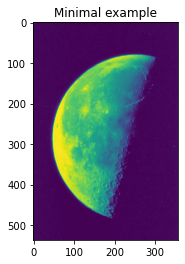

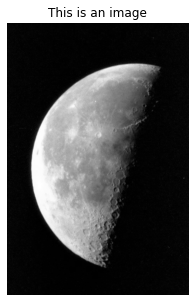

In [12]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage, cmap="viridis")
plt.title('Minimal example')
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()

See also:
- https://matplotlib.org/stable/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercice 1
In this exercice, we work with image `img/moon.png`. **If possible give two solutions : one with loops (for, while, ...) and one without loops.**

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [13]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))

In [14]:
moon = openImage('img/moon.png')
print('Matrix of our image: \n', moon)
print('Shape:', moon.shape)

Matrix of our image: 
 [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
Shape: (537, 358)


2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [15]:
def countPixelsUsingLoops(I,k):
    """ Array*int -> int
    using loops
    """
    count = 0
    N,M = I.shape
    for i in range(N):
        for j in range(M):
            if I[i,j] == k:
                count += 1
    return count

print("Number of pixels having the value 6:", countPixelsUsingLoops(moon, 6))

Number of pixels having the value 6: 7369


In [16]:
def countPixels(I,k):
    """ Array*int -> int
    without loops
    """
    return np.sum(I == k) # or (I == k).sum(), but np.sum() is technically more efficient on (numpy) arrays

print("Number of pixels having the value 6:", countPixels(moon, 6))
print("Number of pixels having the value 129:", countPixels(moon, 129))

Number of pixels having the value 6: 7369
Number of pixels having the value 129: 227


3. Write and test a function `replacePixels()` getting an array and two integers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [17]:
def replacePixelsUsingLoops(I,k1,k2):
    """ Array*int*int -> Array 
    using loops
    """
    output = I.copy()
    N,M = output.shape
    for i in range(N):
        for j in range(M):
            if output[i,j] == k1:
                output[i,j] = k2
    return output

print("Before replacing pixels, we have %d pixels having k1=3 value and %d pixels having k2=9 value." 
      % (countPixels(moon, 3), countPixels(moon, 9)))
print("Thus, by replacing pixels having 3 value to 9 value, we should have %d pixels having 9 value." 
      % (countPixels(moon, 3) + countPixels(moon, 9)))
print("After replacing pixels, we have %d pixels having 3 value and %d pixels having 9 value." 
      % (countPixels(replacePixelsUsingLoops(moon, 3, 9), 3), countPixels(replacePixelsUsingLoops(moon, 3, 9), 9)))

Before replacing pixels, we have 25408 pixels having k1=3 value and 2178 pixels having k2=9 value.
Thus, by replacing pixels having 3 value to 9 value, we should have 27586 pixels having 9 value.
After replacing pixels, we have 0 pixels having 3 value and 27586 pixels having 9 value.


In [18]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array 
    more efficient solution by using np.where(), without loops
    """
    return np.where(I == k1, k2, I)

print("After replacing pixels, we have %d pixels having 3 value and %d pixels having 9 value." 
      % (countPixels(replacePixels(moon, 3, 9), 3), countPixels(replacePixels(moon, 3, 9), 9)))
print("Note that this method is much more efficient than previous one.")

After replacing pixels, we have 0 pixels having 3 value and 27586 pixels having 9 value.
Note that this method is much more efficient than previous one.


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

$ k' = (k_2-k_1) \times \frac{k-k_{min}}{k_{max} - k_{min}} + k_1 $, to normalize our image from $ [k_{min}, k_{max}] $ to $ [ k_1, k_2 ]$.

In [19]:
def normalizeImageUsingLoops(I,k1,k2):
    """ Array*int*int -> Array 
    using loops
    """
    output = I.copy()
    kmin, kmax = np.min(I), np.max(I)
    N,M = output.shape
    for i in range(N):
        for j in range(M):
            output[i,j] = np.rint((k2-k1)*(output[i,j]-kmin)/(kmax-kmin)+k1)
    return output

print("Initial dynamic range: [%d, %d]" % (np.min(moon), np.max(moon)))
print("New dynamic range (should be [64, 128]): [%d, %d]" 
      % (np.min(normalizeImageUsingLoops(moon, 64, 128)), np.max(normalizeImageUsingLoops(moon, 64, 128))))

Initial dynamic range: [0, 253]
New dynamic range (should be [64, 128]): [64, 128]


In [20]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array
    using array arithmetics
    """
    return np.array(np.rint((k2-k1)*((I-np.min(I))/(np.max(I)-np.min(I)))+k1), dtype="int")

print("Initial dynamic range: [%d, %d]" % (np.min(moon), np.max(moon)))
print("New dynamic range (should be [64, 128]): [%d, %d]" 
      % (np.min(normalizeImage(moon, 64, 128)), np.max(normalizeImage(moon, 64, 128))))

Initial dynamic range: [0, 253]
New dynamic range (should be [64, 128]): [64, 128]


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$)

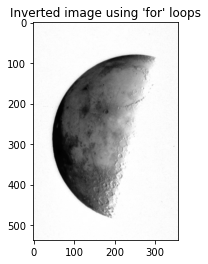

Pixels having 64 value before inverting: 179
Pixels having 255-64=191 value after inverting (should be 179): 179


In [21]:
def inverteImageUsingLoops(I):
    """ Array -> Array 
    using loops
    """
    output = I.copy()
    N,M = output.shape
    for i in range(N):
        for j in range(M):
            output[i,j] = 255-output[i,j]
    return output

plt.imshow(inverteImageUsingLoops(moon))
plt.title("Inverted image using 'for' loops")
plt.show()

print("Pixels having 64 value before inverting:", countPixels(moon, 64))
print("Pixels having 255-64=191 value after inverting (should be 179):", countPixels(inverteImageUsingLoops(moon), 255-64))

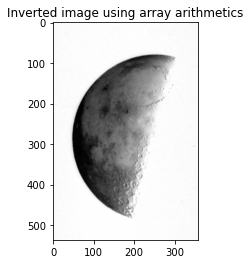

Pixels having 6 value before inverting: 7369
Pixels having 255-6=249 value after inverting (should be 7369): 7369


In [22]:
def inverteImage(I):
    """ Array -> Array 
    using array arithmetics
    """
    return (255-I)

plt.imshow(inverteImage(moon))
plt.title("Inverted image using array arithmetics")
plt.show()

print("Pixels having 6 value before inverting:", countPixels(moon, 6))
print("Pixels having 255-6=249 value after inverting (should be 7369):", countPixels(inverteImage(moon), 255-6))

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

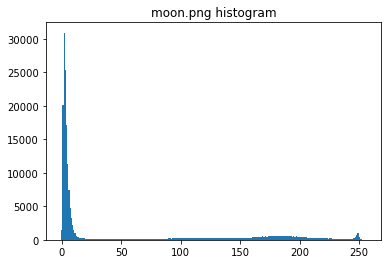

In [23]:
def computeHistogramUsingLoops(I):
    """ Array -> list[int] 
    using loops
    """
    N, M = I.shape
    hist = np.zeros(256) # while we could compute our range L = (kmax - kmin) + 1, it happens kmin isn't necesserarily 0 and  
                         # kmax isn't necesserarily 255. having an histogram on the whole 8-bit dynamic range is more 
                         # interesting, especially if our image has been normalized, equalized, etc. It also prevents `out of 
                         # range` errors and having to work around them.
    for i in range(N):
        for j in range(M):
            hist[I[i,j]] += 1
    return hist.astype("int")

bins = np.arange(0, 256, 1)
hist = computeHistogramUsingLoops(moon)
plt.bar(bins, hist, width = 1)
plt.title("moon.png histogram")
plt.show()

In the solution above, we computed the histogram by explicitely visiting array pixels. We can avoid that by using our `countPixels` function we defined at question 2.

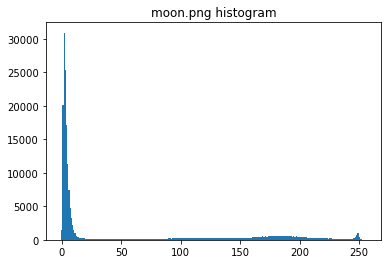

In [24]:
def computeHistogram(I):
    """ Array -> list[int] 
    without using loops
    """
    bins = np.unique(I) # our range is given by the sorted unique k values of our image
    hist = np.zeros(256)
    for pixel in bins:
        hist[pixel] = countPixels(I, pixel)
    return hist.astype("int")

hist = computeHistogram(moon)
plt.bar(bins, hist, width = 1)
plt.title("moon.png histogram")
plt.show()

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

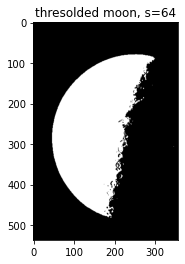

We can verify that we only have two k values (which should be 0 and 255) left in our image: [  0 255]
Moreover, with a a thresold at 64, we should have 134886 pixels at 0 value and 57360 pixels at 255 value.
We can verify it by using our 'countPixels' function: we have 134886 pixels at 0 value and 57360 pixels at 255 value.


In [25]:
def thresholdImageUsingLoops(I,s):
    """ Array*int -> Array 
    using loops
    """
    output = I.copy()
    N, M = output.shape
    for i in range(N):
        for j in range(M):
            if output[i,j] < s:
                output[i,j] = 0
            else:
                output[i,j] = 255
    return output

plt.imshow(thresholdImageUsingLoops(moon, 64))
plt.title("thresolded moon, s=64")
plt.show()
print("We can verify that we only have two k values (which should be 0 and 255) left in our image:",
      np.unique(thresholdImageUsingLoops(moon, 64)))
print("Moreover, with a a thresold at 64, we should have %d pixels at 0 value and %d pixels at 255 value." %
     (np.sum(moon < 64), np.sum(moon >=64)))
print("We can verify it by using our 'countPixels' function: we have %d pixels at 0 value and %d pixels at 255 value." %
     (countPixels(thresholdImageUsingLoops(moon, 64), 0), countPixels(thresholdImageUsingLoops(moon, 64), 255)))

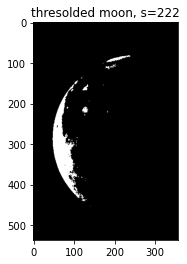

We can verify that we only have two k values (which should be 0 and 255) left in our image : [  0 255]
Moreover, with a a thresold at 127, we should have 184921 pixels at 0 value and 7325 pixels at 255 value.
We can verify it by using our 'countPixels' function: we have 184921 pixels at 0 value and 7325 pixels at 255 value.


In [26]:
def thresholdImage(I,s):
    """ Array*int -> Array 
    without using loops
    """
    return np.where(I < s, 0, 255)

plt.imshow(thresholdImage(moon, 222))
plt.title("thresolded moon, s=222")
plt.show()
print("We can verify that we only have two k values (which should be 0 and 255) left in our image :",
      np.unique(thresholdImage(moon, 222)))
print("Moreover, with a a thresold at 127, we should have %d pixels at 0 value and %d pixels at 255 value." %
     (np.sum(moon < 222), np.sum(moon >=222)))
print("We can verify it by using our 'countPixels' function: we have %d pixels at 0 value and %d pixels at 255 value." %
     (countPixels(thresholdImageUsingLoops(moon, 222), 0), countPixels(thresholdImageUsingLoops(moon, 222), 255)))

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

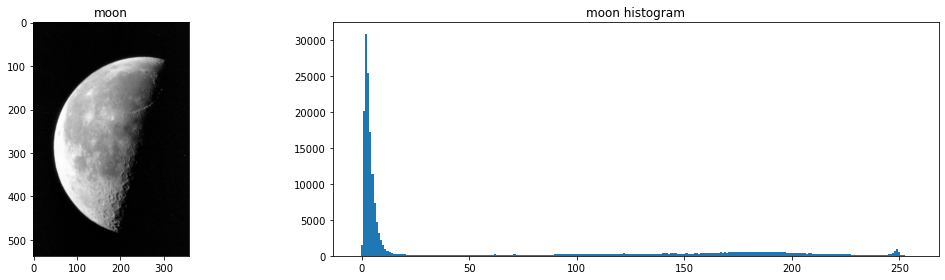

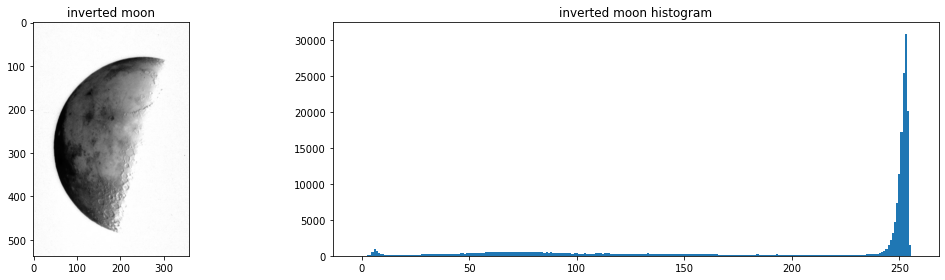

In [27]:
import matplotlib.pyplot as plt

## your code start below

# read
moon = openImage("img/moon.png")

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(moon)
plt.title("moon")

# histogram
hist = computeHistogram(moon)
plt.subplot(1,2,2)
plt.bar(bins, hist, width = 1)
plt.title("moon histogram")
plt.tight_layout()
plt.show()

## inverted
invertedMoon = inverteImage(moon)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(invertedMoon)
plt.title("inverted moon")

# histogram
hist = computeHistogram(invertedMoon)
plt.subplot(1,2,2)
plt.bar(bins, hist, width = 1)
plt.title("inverted moon histogram")
plt.tight_layout()
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

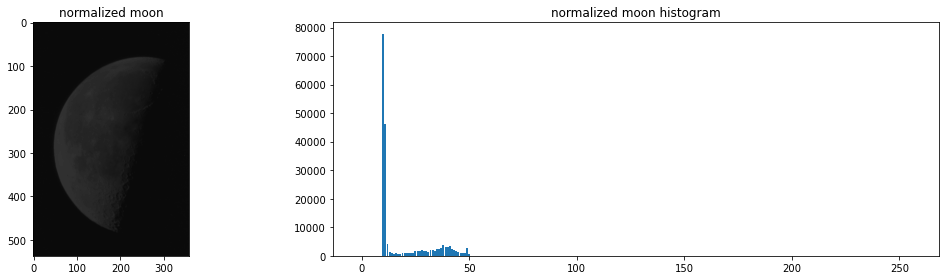

In [28]:
# As we'll be working on the same image, and to avoid repetition, its display and histogram can be found above at question 8.

# normalization to the interval [10,50]
normalizedMoon = normalizeImage(moon, 10, 50)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(normalizedMoon, vmin=0, vmax=255)
plt.title("normalized moon")

# histogram
hist = computeHistogram(normalizedMoon)
plt.subplot(1,2,2)
plt.bar(bins, hist, width=0.9)
plt.title("normalized moon histogram")
plt.tight_layout()
plt.show()

By decreasing our dynamic range, we lose a lot of information (brightness decreased) and it becomes harder to distinguish details, especially the lunar craters.

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

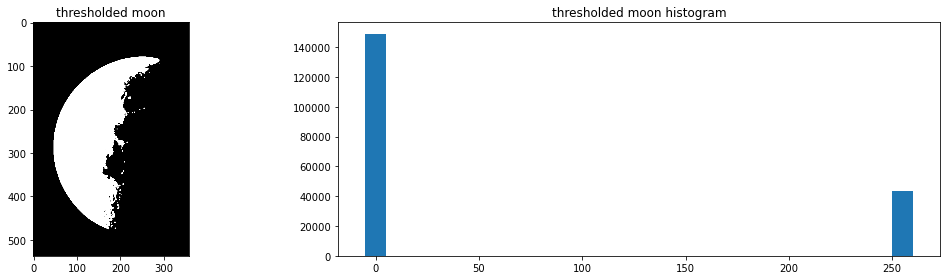

In [29]:
# As we'll be working on the same image, and to avoid repetition, its display and histogram can be found above at question 8.

# thresolding with parameter s = 127
s = 127
thresholdedMoon = thresholdImage(moon, s)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(thresholdedMoon, vmin=10, vmax=50)
plt.title("thresholded moon")

# histogram 
hist = computeHistogram(thresholdedMoon)
plt.subplot(1,2,2)
plt.bar(bins, hist, width = 10)
plt.title("thresholded moon histogram")
plt.tight_layout()
plt.show()

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 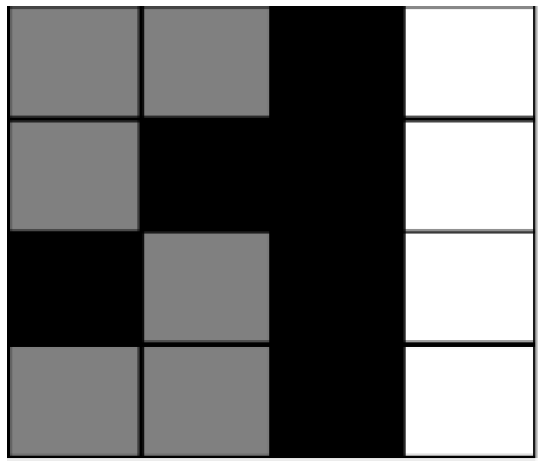 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

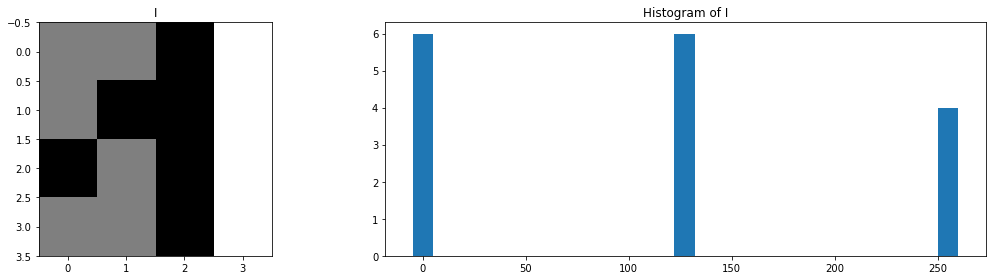

In [30]:
I = np.array([[127, 127, 0, 255],
              [127, 0,   0, 255],
              [0  , 127, 0, 255],
              [127, 127, 0, 255]])

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(I)
plt.title("I")

# histogram
hist = computeHistogram(I)
plt.subplot(1,2,2)
plt.bar(bins, hist, width = 10)
plt.title("Histogram of I")
plt.tight_layout()
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

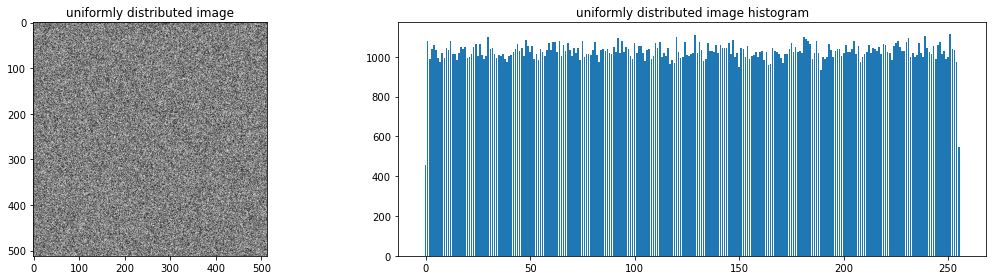

Mean: 1024.0
Standard deviation: 56.38449199469655
Min, Max: [455, 1117]


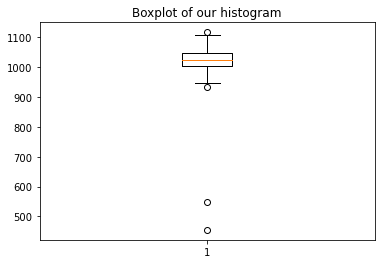

In [31]:
import numpy.matlib

def generateUniformArray(N,M):
    """ int*int -> Array """
    return np.array(np.rint(np.random.rand(N,M)*255), dtype="int")

# creating our image
uniformImage = generateUniformArray(512,512)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(uniformImage)
plt.title("uniformly distributed image")

# histogram
hist = computeHistogram(uniformImage)
plt.subplot(1,2,2)
plt.bar(bins, hist)
plt.title("uniformly distributed image histogram")
plt.tight_layout()
plt.show()

# analysis
print("Mean:", np.mean(hist))
print("Standard deviation:", np.std(hist))
print("Min, Max: [%d, %d]" % (np.min(hist), np.max(hist)))
plt.boxplot(hist)
plt.title("Boxplot of our histogram")
plt.show()

As we could have expected, and because the pixels from our image have been uniformly distributed in the set $\{0,1,\cdots,255\}$, our histogram approach the same probability law. We would approximately expect $ \frac{512 \times 512}{255} = 1028 $ pixels for each k value, while we have $1024 \pm 56 $ pixels for each k value in our image. This result is almost surely always true because of the large ammount of pixels, but we can note that we will always have some outsiders.

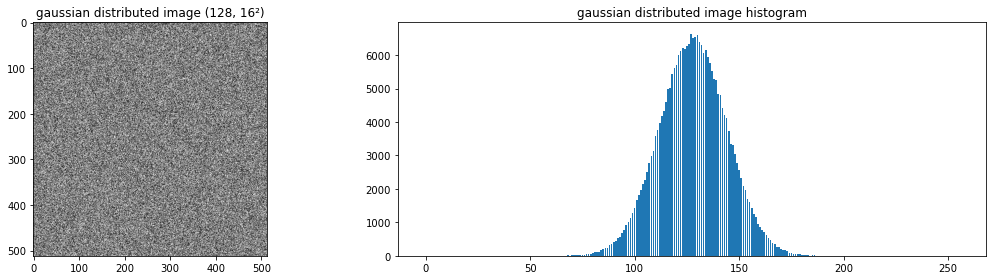

In [32]:
def generateGaussianArray(N,M,mean,std):
    """ int*int*int*int -> Array """
    return np.array(np.rint(np.random.randn(N, M)*std+mean), dtype="int")

gaussianImage = generateGaussianArray(512, 512, 128, 16)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(uniformImage)
plt.title("gaussian distributed image (128, 16²)")

# histogram
hist = computeHistogram(gaussianImage)
plt.subplot(1,2,2)
plt.bar(bins, hist)
plt.title("gaussian distributed image histogram")
plt.tight_layout()
plt.show()

We can compare this histogram with the real plot of the normal distribution $\mathcal{N}(128, 256)$. Both plots superspose each other. 

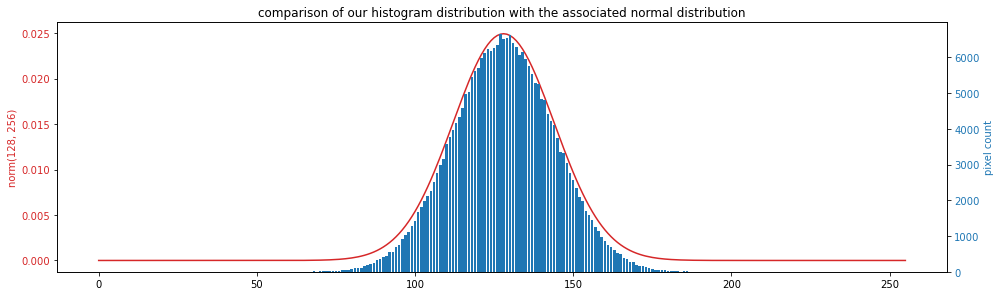

In [33]:
from scipy.stats import norm

fig, ax1 = plt.subplots(figsize=(14,4))
color = 'tab:red'
x_axis = np.arange(0, 256, 1)
ax1.plot(x_axis, norm.pdf(x_axis,128,16), color=color)
ax1.set_ylabel('norm(128, 256)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.bar(bins, hist)
ax2.set_ylabel('pixel count', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.title('comparison of our histogram distribution with the associated normal distribution')
plt.show()

More specifically, we could find that 95 % of our pixels are of intensity $[\mu-2\sigma, \mu+2\sigma]=[128-2\times16,128+2\times16]=[96,160]$. <br>
Finally, to the human eye, both images looks approximately the same because of the randomness of each pixel and because there are no specific patterns that catch our attention, but histograms say differently.

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

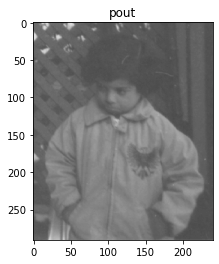

In [34]:
pout = openImage("img/pout.png")
plt.imshow(pout, vmin=0, vmax=255)
plt.title("pout")
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

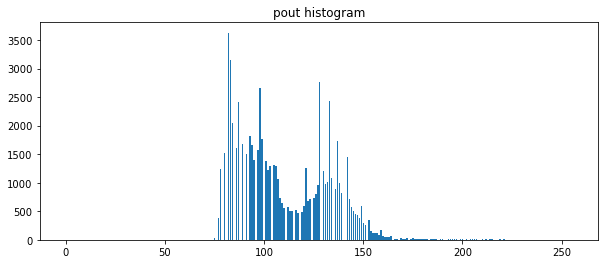

Extrema:  (74, 224)


In [35]:
hist = computeHistogram(pout)
plt.figure(figsize=(10,4))
plt.bar(bins, hist)
plt.title("pout histogram")
plt.show()

print("Extrema: ", (np.min(pout), np.max(pout)))

Our image has a really restrained dynamic range and doesn't use the available grayscale range in its totality, giving it a "washed-out" appearance.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

The transformation of an histogram equalization is:

$k' = \text{Int}(\frac{L-1}{N \times M}H_c(k)) = \text{Int}(\frac{k_{max} - k_{min}}{N \times M}H_c(k)) $ 

where:

$ L = k_{max} - k_{min} + 1 $ the dynamic range, <br>
$ N \times M $ the image size, <br>
$ H_c(k) $, the cumulative histogram, <br>
$ \text{Int} $ rounding to the nearest integer.

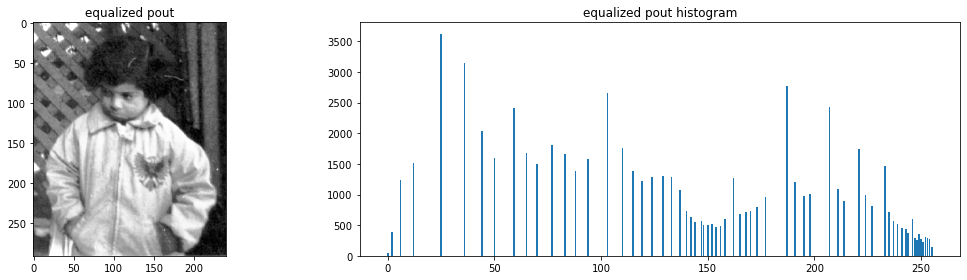

In [36]:
def histogramEqualizationUsingLoops(I,h):
    """ Array * (list[int]) -> Array 
    using loops
    """
    output = I.copy()
    N,M = output.shape
    cumulativehist = np.cumsum(h) # cumulative histogram
    for x in range(N):
        for y in range(M):
            output[x,y] = np.rint(255/(N*M)*cumulativehist[output[x,y]])
    return output

hist = computeHistogram(pout)
equalizedPout = histogramEqualizationUsingLoops(pout,hist)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(equalizedPout)
plt.title("equalized pout")

# histogram
plt.subplot(1,2,2)
plt.bar(bins, computeHistogram(equalizedPout))
plt.title("equalized pout histogram")
plt.tight_layout()
plt.show()

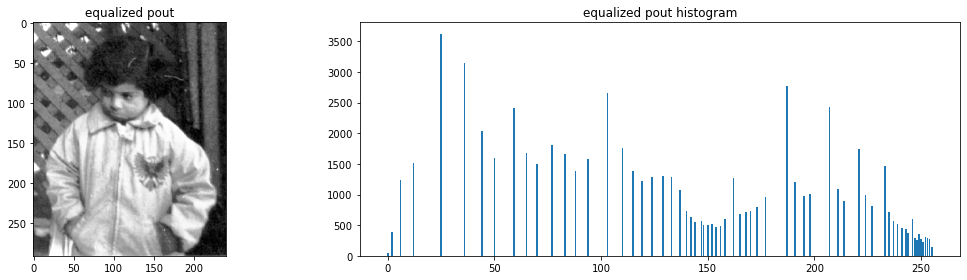

Extrema: (0, 255)


In [37]:
def histogramEqualization(I,h):
    """ Array * (list[int]) -> Array 
    using array arithmetics
    """
    return np.array(np.rint(255/(np.shape(I)[0]*np.shape(I)[1])*np.cumsum(hist)[I]), dtype="int")

hist = computeHistogram(pout)
equalizedPout = histogramEqualization(pout,hist)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(equalizedPout)
plt.title("equalized pout")

# histogram
plt.subplot(1,2,2)
plt.bar(bins, computeHistogram(equalizedPout))
plt.title("equalized pout histogram")
plt.tight_layout()
plt.show()

print("Extrema:", (np.min(equalizedPout), np.max(equalizedPout)))

Our image is now using the whole 8-bit range (from $[74, 224]$ to $[0, 255]$, giving it a better contrast while increasing its clarity and readability. We can compare our equalization method to a normalization one.

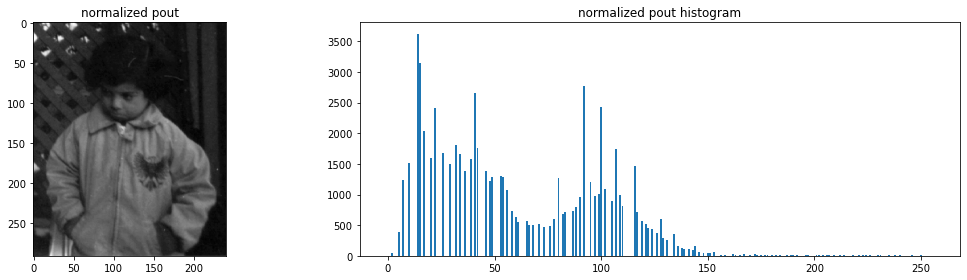

In [38]:
normalizedPout = normalizeImage(pout, 0, 255)

# display
plt.subplots(figsize=(16,4))
plt.subplot(1,2,1)
plt.imshow(normalizedPout)
plt.title("normalized pout")

# histogram
hist = computeHistogram(normalizedPout)
plt.subplot(1,2,2)
plt.bar(bins, hist, width=0.9)
plt.title("normalized pout histogram")
plt.tight_layout()
plt.show()

In [39]:
print("Number of pixels having %d value (max) on our original image: %d" 
      % (np.max(pout), countPixels(pout, np.max(pout))))
print("Number of pixels having %d value (max) on our normalized image: %d"
      % (np.max(normalizedPout), countPixels(normalizedPout, np.max(normalizedPout))))
print("Number of pixels having %d value (max) on our equalized image: %d"
      % (np.max(equalizedPout), countPixels(equalizedPout, np.max(equalizedPout))))

Number of pixels having 224 value (max) on our original image: 2
Number of pixels having 255 value (max) on our normalized image: 2
Number of pixels having 255 value (max) on our equalized image: 141


While both equalization and normalization methods distribute our pixels intensity to a bigger range (in our case, full 8-bit range), both methods produce different results. We can see above that normalization acts more as a stretching technique, meaning he bins distribution is changed but not their size, whereas equalization changes the bins distribution in the histogram as well as their size. In the case of a photograph, both methods can work depending on what we are looking for. Here, we could argue that the normalized image has a warmer contrast, while the equalized image is more readable as we can tell contours and objects better, but some spots can be too bright.